# Question 1 : Logistic Regression


## Import functions and data

In [28]:
# run this cell to import nltk
import numpy as np
import pandas as pd
import nltk
from os import getcwd
import re
import string
import matplotlib.pyplot as plt

### Imported functions

Download the data needed for this assignment. Check out the [documentation for the twitter_samples dataset](http://www.nltk.org/howto/twitter.html).

* twitter_samples and stopwords: While running on a local computer you need to download them using
```Python
nltk.download('twitter_samples')
nltk.download('stopwords')
```

#### Import some helper functions that we provided in the utils.py file:
* `clean_tweet()`: cleans, tokenizes, removes stopwords, and converts words to stems.
* `build_frequency()`: this counts how often a word in the the entire set dataset of tweets was associated with a positive label '1' or a negative label '0', then builds the `frequency_words` dictionary, where each key is a (word,label) tuple, and the value is the count of its frequency within the corpus of tweets.
* The `frequency_words` dictionary is the frequency dictionary that's being built. 

In [29]:
nltk.download('twitter_samples')
nltk.download('stopwords')

[nltk_data] Downloading package twitter_samples to /root/nltk_data...
[nltk_data]   Package twitter_samples is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [30]:
# this code allows us to prevent downloading data again while refreshing our workspace
filePath = f"{getcwd()}/../temp/"
nltk.data.path.append(filePath)

In [31]:
print(filePath)

/content/../temp/


### Data processing
* The `twitter_samples` contains subsets of 5,000 positive tweets, 5,000 negative tweets, and the full set of 10,000 tweets.  

In [32]:
from nltk.corpus import twitter_samples 
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.tokenize import TweetTokenizer

In [33]:
def clean_tweet(tweet):
    
    # tweets_clean: a list of words containing the processed tweet
    stemmer = PorterStemmer()
    stopwords_english = stopwords.words('english')
    # remove stock market symbols like $GE
    tweet = re.sub(r'\$\w*', '', tweet)
    # remove old style retweet text "RT"
    tweet = re.sub(r'^RT[\s]+', '', tweet)
    # remove hyperlinks
    tweet = re.sub(r'https?:\/\/.*[\r\n]*', '', tweet)
    # remove hashtags
    # only removing the hash # sign from the word
    tweet = re.sub(r'#', '', tweet)
    # tokenize tweets
    tokenizer = TweetTokenizer(preserve_case=False, strip_handles=True,
                               reduce_len=True)
    tweet_tokens = tokenizer.tokenize(tweet)

    tweets_clean = []
    for word in tweet_tokens:
        if (word not in string.punctuation and  
                word not in stopwords_english): 
            stem_word = stemmer.stem(word)  # stemming word
            tweets_clean.append(stem_word)

    return tweets_clean


def build_frequency(tweets, y_np):
 
    # Convert np array to list since zip needs an iterable.
    # The squeeze is necessary or the list ends up with one element.
    yslist = np.squeeze(y_np).tolist()

    # Start with an empty dictionary and populate it by looping over all tweets
    # and over all processed words in each tweet.
    freqs = {}
    for i in range(len(tweets)):
        tweet = tweets[i]
        y = yslist[i]
        for word in clean_tweet(tweet):
            pair = (word, y)
            if pair in freqs:
                freqs[pair] += 1
            else:
                freqs[pair] = 1

    return freqs

In [34]:
# select the set of positive and negative tweets
positive_tweets = twitter_samples.strings('positive_tweets.json')
negative_tweets = twitter_samples.strings('negative_tweets.json')

In [35]:
print(positive_tweets[7])
print(negative_tweets[10])


@Impatientraider On second thought, there’s just not enough time for a DD :) But new shorts entering system. Sheep must be buying.
I have a really good m&amp;g idea but I'm never going to meet them :(((


### Feature Extraction

* Given a list of tweets, extract the features and store them in a matrix. You will extract two features.
    * The first feature is the number of positive words in a tweet.
    * The second feature is the number of negative words in a tweet. 
    * For each word, check the `frequency_words` dictionary for the count when that word has a positive '1' label. (Check for the key (word, 1.0)
    * Do the same for the count for when the word is associated with the negative label '0'. (Check for the key (word, 0.0).)

In [36]:
def extract_features(tweet, freqs):
    
    # clean_tweet tokenizes, stems, and removes stopwords
    word_l = clean_tweet(tweet)
    
    # 3 elements in the form of a 1 x 3 vector
    x = np.zeros((1, 3)) 
    x[0,0] = 1 
    
    for word in word_l:
        
        # increment the word count when the  label is positive 
        x[0,1] = x[0,1] + freqs.get((word, 1.0),0)
        # increment the word count when the  label is negative 
        x[0,2] = x[0,2] + freqs.get((word, 0.0),0)
        
    return x

#### Instructions: Write `sigmoid`
Finds the sigmoid of z 

In [37]:
def sigmoid(z): 
    
    # z is an input which can be a scalar or an array and h is the sigmoid of z 
    # write the formula for sigmoid here and assign it to h
    h = 1/(1+np.exp(-z))
    
    return h

#### Instructions: Write `predict_positivity_score`
Predict whether a tweet is positive or negative.

* Given a tweet, process it, then extract the features.
* Apply the model's learned weights on the features to get the y.
* Apply the sigmoid to the y to get the prediction (a value between 0 and 1).


In [38]:
def predict_positivity_score(tweet, freqs, theta):
    
    
    # extracting features from tweet and the frequencies, this x will multiply with the coefficients which are passed to the 
    # sigmoid 
    x = extract_features(tweet,freqs)

    # make the prediction using x and theta
    # you need to make calculations for y_pred here. You may need to call sigmoid function here
    y_pred = sigmoid(np.dot(x,theta))
    
    return y_pred

Note that the `frequency_words` dictionary should be based on the training data and training labels. Here we have done this for a few number of data points


The given function `clean_tweet()` makes tokens from words and applies stemming (producing some variant of a root/base word) and removes stop words (commonly used words such as "the" ,"a" ,"an" among other words)

In [39]:
#IMPLEMENT gradient descient here. 
# alpha is the learning rate 
# x is the data and y is hte label 
# theta is the initial parameter values 
# num_iters is the number of iterations you want the algorithm to run
def gradientDescent(x, y, theta, alpha, num_iters):
    N = x.shape[0]

    list_of_loss_values = []
    list_of_training_accuracy = []
      
    for i in range(0, num_iters):
               
        #sigmoid
        h = sigmoid(np.dot(x,theta))
        
        #loss function
        Z = -(np.dot(y.T,np.log(h))+np.dot((1-y).T,np.log(1-h)))/N
        list_of_loss_values.append(Z[0,0])

        #update the parameter values
        theta = theta - alpha*(np.dot(x.T,h-y))/N

        y_hat = sigmoid(np.dot(x,theta))
        y_hat = (y_hat > 0.5).astype(int)

        list_of_training_accuracy.append(np.sum(y.reshape(1,-1) == y_hat.reshape(1,-1))/len(y))
          
    J = float(Z) 

    # list_of_loss_values is the loss for each iteration which , same is the case with training accuracy
    return J, theta,list_of_loss_values,list_of_training_accuracy

* Train test split: 25% will be in the test set, and 75% in the training set.

# Example
 # Here we show how to call these methods for a few data points. You  may have to use similar calls to the training data after you make the test train split.

In [40]:
#some_number_of_tweets = positive_tweets[0:10] + negative_tweets[0:10]
#some_number_of_labels = np.append(np.ones((len(positive_tweets[0:10]), 1)), np.zeros((len(negative_tweets[0:10]), 1)), axis=0)

In [41]:
#frequency_words = build_frequency(some_number_of_tweets, some_number_of_labels)

In [42]:

# Random tests, you can remove these if you want later , but it may help in testing the code 
#print(extract_features(some_number_of_tweets[6], frequency_words))
# test 2:
# check for when the words are not in the frequency_words dictionary
#print(extract_features('lalalalala blahblahblah bobobobobbob', frequency_words))


**Test-train split**

75% of the data for training and remaining 25 % for testing.

In [43]:
train_percent = 0.75

pos_split = int(train_percent*len(positive_tweets))
neg_split = int(train_percent*len(negative_tweets))

test_pos_tweets = positive_tweets[pos_split:]
train_pos_tweets = positive_tweets[:pos_split]
test_neg_tweets = negative_tweets[neg_split:]
train_neg_tweets = negative_tweets[:neg_split]

train_x = train_pos_tweets + train_neg_tweets
test_x = test_pos_tweets + test_neg_tweets

train_y = np.append(np.ones((len(train_pos_tweets), 1)), np.zeros((len(train_neg_tweets), 1)), axis=0)
test_y = np.append(np.ones((len(test_pos_tweets), 1)), np.zeros((len(test_neg_tweets), 1)), axis=0)

frequency_words = build_frequency(train_x, train_y)

In [44]:
# NOTE : call gradient descent to get coefficents and then pass that coefficents into predict function 
# something like : predict_positivity_score(tweet, frequency_words, coefficents)

**Feature extraction**

In [45]:
X = np.zeros((len(train_x), 3))
for i in range(len(train_x)):
    X[i, :]= extract_features(train_x[i], frequency_words)

# training labels corresponding to X
Y = train_y

**Scatter plot of number of ”positive” words vs number of ”negative” words for the tweets
in the training dataset**

We can observe clustering in the plot and no mixing of colours which shows good separation between positive and negative tweets with the model.

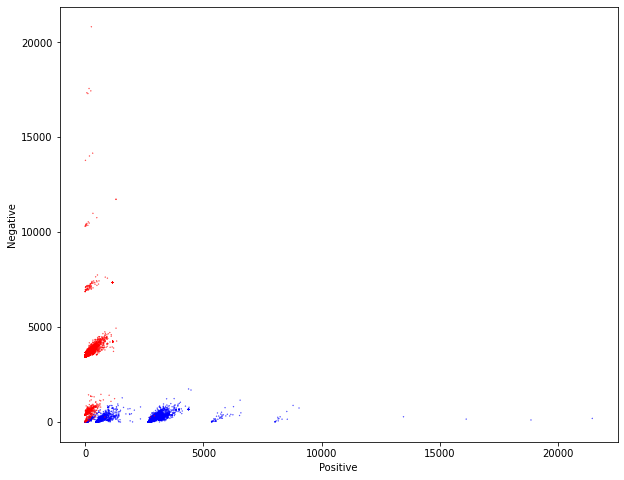

In [46]:
fig, ax = plt.subplots(figsize = (10, 8))

colors = ['red', 'blue']

# Color based on the sentiment Y
ax.scatter(X[:,1], X[:,2], c=[colors[int(k)] for k in Y], s = 0.1)
plt.xlabel("Positive")
plt.ylabel("Negative")
plt.show()

**Gradient descent to update weights**

In [47]:
J, theta, list_of_loss_values, list_of_training_accuracy = gradientDescent(X, Y, np.zeros((3, 1)), 1e-8, 2000)

print(f"The cost after training is {J}.")
print(f"The resulting vector of weights is {[round(t, 8) for t in np.squeeze(theta)]}")

The cost after training is 0.09937357479783808.
The resulting vector of weights is [6.7e-07, 0.00167578, -0.00136128]


**Misclassified tweets**

There are 51 number of misclassified tweet by the model.

In [48]:
y_hat_miss = sigmoid(np.dot(X,theta))
y_hat_miss = (y_hat_miss > 0.5).astype(int)
miss_indices = []

for i in range(len(Y)):
  if Y[i]!=y_hat_miss[i]:
    miss_indices.append(i)
    if y_hat_miss[i]==0:
      print(f"Misclassified tweet '{train_x[i]}' as negative tweet")
    else:
      print(f"Misclassified tweet '{train_x[i]}' as positive tweet")

print(f'Total number of misclassified tweets during training = {len(miss_indices)}')

Misclassified tweet 'Funny how that happened when Phil was here too : )' as negative tweet
Misclassified tweet 'I'm playing Brain Dots : ) #BrainDots
http://t.co/cHl12JvuxN http://t.co/GGgU9PYEjI' as negative tweet
Misclassified tweet 'Please go check out my awesome friend's stream at http://t.co/uVBD0iDwDW ! He's a fantastic artist. :)' as negative tweet
Misclassified tweet 'I'm playing Brain Dots : ) #BrainDots
http://t.co/MifDDs7CQS http://t.co/WtIWoeATPj' as negative tweet
Misclassified tweet 'An apartment makeover? http://t.co/ctLa1jppdb great ideas for factory living :)' as negative tweet
Misclassified tweet 'Remember that one time I didn't go to flume/kaytranada/alunageorge even though I had tickets? I still want to kms. : ) : )' as negative tweet
Misclassified tweet '@Namraeter Here you go: http://t.co/nGJ1vzhsj1, please click on the link and checkout! :)' as negative tweet
Misclassified tweet '@hectorparr0123 @hackadayio Sticker came with my sponsor prize for @HackadayPrize en

**Plots for variation of accuracy and loss as a function of number of iterations**

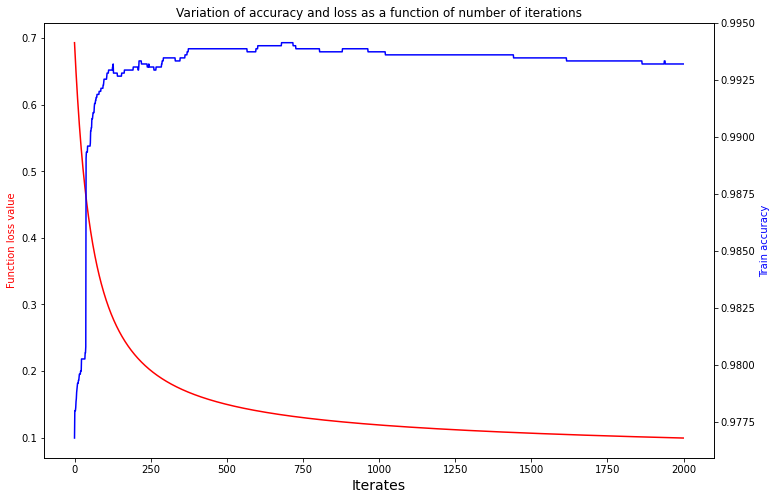

In [49]:
fig,ax = plt.subplots(figsize=(12,8))
# make a plot
ax.plot(list_of_loss_values, color="red")
ax.set_title("Variation of accuracy and loss as a function of number of iterations")
# set x-axis label
ax.set_xlabel("Iterates", fontsize = 14)
# set y-axis label
ax.set_ylabel("Function loss value", color="red")
# twin object for two different y-axis on the sample plot
ax2=ax.twinx()
# make a plot with different y-axis using second axis object
ax2.plot(list_of_training_accuracy,color="blue")
ax2.set_ylabel("Train accuracy",color="blue")
plt.show()

## Testing your model
After training your model using the training set above, check how your model might perform on real, unseen data, by testing it against the test set.

#### Implement `test_logistic` 
* Given the test data and the weights of your trained model, calculate the accuracy of your logistic regression model. 
* Use your `predict_positivity_score()` function to make predictions on each tweet in the test set.
* If the prediction is >= 0.5, set the model's the predicted label is 1 otherwise it is 0.  


In [50]:
# Testing your model on the test set
def test_logistic(test_x, test_y, freqs, theta):
    
    #use your trained model to make predictions and then compare those predictions with the 
    # actual values to come up with an accuracy. and return this accuracy

    y_hat = []
    
    for tweet in test_x:
 
        y_pred = predict_positivity_score(tweet, freqs, theta)
        
        if y_pred >= 0.5:
            y_hat.append(1.0)
        else:
            y_hat.append(0.0)

    accuracy = np.sum(test_y.reshape(1,-1) == (np.array(y_hat)))/len(test_y)
    
    return accuracy

**Training and test accuracies at the end of training.**

Test accuracy = 0.9932

Train accuracy at the end of training= 0.9932

In [51]:
test_accuracy = test_logistic(test_x, test_y, frequency_words, theta)
print(f'Test accuracy = {test_accuracy}')
print(f'Train accuracy at the end of training= {list_of_training_accuracy[-1]}')


Test accuracy = 0.9932
Train accuracy at the end of training= 0.9932


**Predict the scores for the sentences**

Predicted score for the tweet 'Let that sink in' = 0.51301274 and is a **positive sentiment**

Predicted score for the tweet 'My psychiatrist told me I was crazy and I said I want a second opion. He said okay, you are ugly too ' = 0.46381839 and is a **negative sentiment**

Predicted score for the tweet 'I’d rather have a drink with Mel Gibson in his hotel tonight than Bill Cosby.' = 0.50264881 and is a **positive sentiment**

Predicted score for the tweet 'Building trust is the key to success in any relationship. Excuses, irregularity, chronically late, etc., are the ingredients to kill the TRUST.' = 0.50251737 and is a **positive sentiment**

Predicted score for the tweet 'We are best friends. Always remember that if you fall i will pick you up. After I finish laughing' = 0.52784133 and is a **positive sentiment**

For some tweets the scores are 0.50264881, 0.50251737 etc.. which are in the border of the limit we set to classify. Some words can have both positive and negative emotions depending on the situations. This can lead to misclassify the tweets. An algorithm which can interpret the sentence as a whole and understand the right emotion might give more accurate results.

In [52]:
# Use your model to predict what these result in, whether it is a positive or negative sentiment. If possible, feel free to give
# an intuitive explanation (short explanation) of the scores that you obtained

my_tweet = ['Let that sink in',
            'My psychiatrist told me I was crazy and I said I want a second opion. He said okay, you are ugly too ',
            'I’d rather have a drink with Mel Gibson in his hotel tonight than Bill Cosby.',
            'Building trust is the key to success in any relationship. Excuses, irregularity, chronically late, etc., are the ingredients to kill the TRUST.',
            'We are best friends. Always remember that if you fall i will pick you up. After I finish laughing'
           ]

for tweet in my_tweet:
  y_pred = predict_positivity_score(tweet, frequency_words, theta)
 
  if y_pred >= 0.5:
      print(f"Predicted score for the tweet '{tweet}' = {y_pred[0]} and is a positive sentiment")
  else: 
      print(f"Predicted score for the tweet '{tweet}' = {y_pred[0]} and is a negative sentiment")

Predicted score for the tweet 'Let that sink in' = [0.51301274] and is a positive sentiment
Predicted score for the tweet 'My psychiatrist told me I was crazy and I said I want a second opion. He said okay, you are ugly too ' = [0.46381839] and is a negative sentiment
Predicted score for the tweet 'I’d rather have a drink with Mel Gibson in his hotel tonight than Bill Cosby.' = [0.50264881] and is a positive sentiment
Predicted score for the tweet 'Building trust is the key to success in any relationship. Excuses, irregularity, chronically late, etc., are the ingredients to kill the TRUST.' = [0.50251737] and is a positive sentiment
Predicted score for the tweet 'We are best friends. Always remember that if you fall i will pick you up. After I finish laughing' = [0.52784133] and is a positive sentiment


**Removing 5 emoticons**

Test accuracy after removing emoticons = 0.6892
Training accuracy at the end after removing emoticons = 0.7284

Both test and training accuracies have reduced once the 5 emoticons were removed. This is due to the high weightage given to the emoticons while labeling the dataset. The emoticons are kind of direct representation of the kind of tweet compared to individual word counts and removing then from the model training resulted in defective model.

In [53]:
def clean_tweet(tweet):
    
    # tweets_clean: a list of words containing the processed tweet
    stemmer = PorterStemmer()
    stopwords_english = stopwords.words('english')
    # remove stock market symbols like $GE
    tweet = re.sub(r'\$\w*', '', tweet)
    # remove old style retweet text "RT"
    tweet = re.sub(r'^RT[\s]+', '', tweet)
    # remove hyperlinks
    tweet = re.sub(r'https?:\/\/.*[\r\n]*', '', tweet)
    # remove hashtags
    # only removing the hash # sign from the word
    tweet = re.sub(r'#', '', tweet)
    
    if remove_emo ==True:
      #remove emoticons
      tweet = re.sub(r':-*\(*\)*d*', '', tweet)

    # tokenize tweets
    tokenizer = TweetTokenizer(preserve_case=False, strip_handles=True,
                               reduce_len=True)
    tweet_tokens = tokenizer.tokenize(tweet)

    tweets_clean = []
    for word in tweet_tokens:
        if (word not in string.punctuation and  
                word not in stopwords_english): 
            stem_word = stemmer.stem(word)  # stemming word
            tweets_clean.append(stem_word)

    return tweets_clean

In [54]:
remove_emo = True

frequency_words_wo_emo = build_frequency(train_x, train_y)

X_wo_emo = np.zeros((len(train_x), 3))
for i in range(len(train_x)):
    X_wo_emo[i, :] = extract_features(train_x[i], frequency_words_wo_emo)


# training labels corresponding to X
Y_wo_emo = train_y

J_wo_emo, theta_wo_emo,list_of_loss_values_wo_emo,list_of_training_accuracy_wo_emo = gradientDescent(X_wo_emo, Y_wo_emo, np.zeros((3, 1)), 1e-8, 2000)

print(f"The cost after training is {J:.6f}.")
print(f"The resulting vector of weights is {[round(t, 8) for t in np.squeeze(theta_wo_emo)]}")

test_accuracy_wo_emo = test_logistic(test_x, test_y, frequency_words_wo_emo, theta_wo_emo)

print(f'Test accuracy after removing emoticons = {test_accuracy_wo_emo}')
print(f'Training accuracy at the end after removing emoticons = {list_of_training_accuracy_wo_emo[-1]}')

remove_emo = False

The cost after training is 0.099374.
The resulting vector of weights is [-1e-07, 0.00047287, -0.00035822]
Test accuracy after removing emoticons = 0.6892
Training accuracy at the end after removing emoticons = 0.7284
